# Table of Contents
- [1. Introduction](#Introduction)
- [2. Imports and Overview](#Data-Import-and-Overview)
- [3. Data Preprocessing](#Data-Preprocessing)
- [4. Model Training](#Model-Training)
- [5. Model Evaluation](#Model-Evaluation)
- [6. Prediction Example](#Prediction-Example)
- [7. Data visualization](#Data-Visualization)
- [7. Conclusion](#Conclusion)

# Introduction

The name of the project is **Tip Prediction**. In this project, we explore the world of Machine Learning by building a predictive model that estimates the tips given by customers at a restaurant. This project involves model training using the **Linear Regression** algorithm.


### Objective

The primary objective of this project is to develop a predictive model that accurately estimates the tip amount based on various influencing factors such as the **total bill**, **gender of the customer**, **smoker status**, **day of the week**, and **time of day**. This model can help restaurant owners and managers understand tipping behavior better and potentially optimize service strategies to enhance customer satisfaction.


### Dataset Description

The dataset used in this project is the **'Tips' dataset**. It consists of **244 observations** and **7 features**. The features include:
- **total_bill**: Total bill amount in USD($)
- **sex**: Gender of the customer (Male/Female)
- **smoker**: Whether the customer is a smoker (Yes/No)
- **day**: Day of the week (Thur, Fri, Sat, Sun)
- **time**: Time of the day (Lunch/Dinner)
- **size**: Number of people at the table
- **tip**: Tip amount given by the customer in USD (Target variable)


### Methods and Techniques

To achieve our objective, we will employ the following methods and techniques:
- **Data Preprocessing**: Handling missing values, encoding categorical variables (using techniques like One-Hot Encoding or Label Encoding), and feature scaling.
- **Data Visualization**: Visualizing the data using plots and charts to uncover patterns and relationships between variables. Makes it easier to understand and go through the data.
- **Model Building**: Implementing a Linear Regression model using the **scikit-learn** library to predict the tip amount.
- **Model Evaluation**: Evaluating the model's performance using metrics like Mean Squared Error (MSE) and visualizing the predictions.


### Project Structure

This project is organized into several sections to provide a logical flow and easy navigation:
1. **Introduction**: Overview of the project objectives, dataset, and methods.
2. **Data Exploration**: Initial exploration of the dataset to understand its structure and summary statistics.
3. **Data Preprocessing**: Steps to prepare the data for modeling, including encoding and splitting the dataset.
4. **Model Building**: Creating and training the Linear Regression model.
5. **Model Evaluation**: Assessing the performance of the model and analyzing the results.
6. **Conclusion**: Summarizing the findings and discussing potential improvements or future work.




---------------------------------------------------------------------------------------------------------------------------------------------

# Imports and Overview

In [1]:
#importing all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LinearRegression as LNR
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import mean_squared_error as MSE
import warnings

In [2]:
# Loading the dataset
df = pd.read_csv("tips.csv")

In [3]:
# Defining the feature columns and the target column
X = df.drop(columns=["tip"])
Y = df['tip']

In [4]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [5]:
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

# Data Preprocessing

In [6]:
# Applying Label Encoding to categorical columns
catg_cols = ['sex', 'smoker', 'day', 'time']
label_encoders = {}

In [7]:
for col in catg_cols:
    le = LE()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Model Training

In [8]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = TTS(X, Y, test_size=0.2, random_state=42)

In [9]:
# Creating and training the Linear Regression Model
model = LNR()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [10]:
# Making predictions
y_pred = model.predict(X_test)

In [11]:
# Calculating the model's performance
mse = MSE(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.69


# Prediction Example

In [12]:
def get_user_input():
    print("Enter the following details:")
    
    total_bill = float(input("Total Bill ($): "))
    sex = input("Sex (Male/Female): ").capitalize()
    smoker = input("Smoker (Yes/No): ").capitalize()
    day = input("Day (Sun/Sat/Fri): ").capitalize()
    time = input("Time (Dinner/Lunch): ").capitalize()
    size = int(input("Size of the group: "))
    
    for feature, value in zip(['sex', 'smoker', 'day', 'time'], [sex, smoker, day, time]):
        if value not in label_encoders[feature].classes_:
            raise ValueError(f"Invalid input for {feature}. Expected one of {list(label_encoders[feature].classes_)}.")

    example_data = pd.DataFrame({
        'total_bill': [total_bill],
        'sex': [label_encoders['sex'].transform([sex])[0]],
        'smoker': [label_encoders['smoker'].transform([smoker])[0]],
        'day': [label_encoders['day'].transform([day])[0]],
        'time': [label_encoders['time'].transform([time])[0]],
        'size': [size]
    })
    
    return example_data

def predict_tip():
    try:
        user_data = get_user_input()
        predicted_tip = model.predict(user_data)
        print(f"Predicted tip: ${predicted_tip[0]:.2f}")
    except ValueError as e:
        print(f"Error: {e}")

predict_tip()

Enter the following details:


Total Bill ($):  1000
Sex (Male/Female):  Male
Smoker (Yes/No):  yes
Day (Sun/Sat/Fri):  sat
Time (Dinner/Lunch):  dinner
Size of the group:  10


Predicted tip: $96.82


# Data Visualization

In [13]:
# Checking the unique values in the 'day' column
print(df['day'].unique())

['Sun' 'Sat' 'Thur' 'Fri']


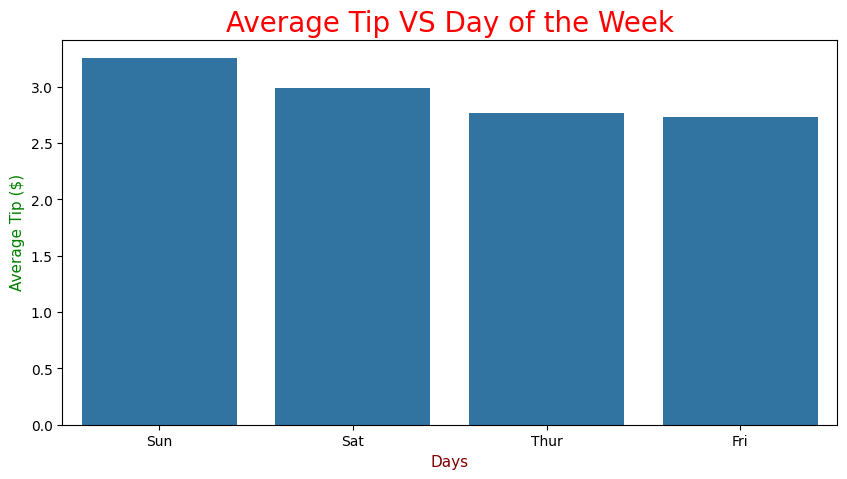

In [14]:
# 1. Bar Chart: Average Tip VS Days of the Week
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 5))
sns.barplot(x='day', y='tip', data=df, ci=None)
plt.title('Average Tip VS Day of the Week', color="red", fontsize=20)
plt.ylabel('Average Tip ($)', color="green", fontsize=11)
plt.xlabel('Days', color="maroon", fontsize=11)
plt.show()

In [15]:
# Checking the unique values in the 'sex' column
print(df['sex'].unique())

['Female' 'Male']


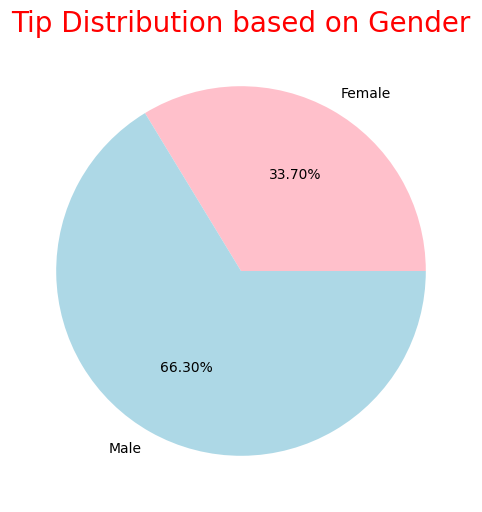

In [16]:
# 2. Pie Chart: Distribution of Tips by Gender
gender_tip_sum = df.groupby('sex')['tip'].sum()
plt.figure(figsize=(8, 6))
gender_tip_sum.plot.pie(autopct='%1.2f%%', colors=['pink', 'lightblue'])
plt.title('Tip Distribution based on Gender', color="red", fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

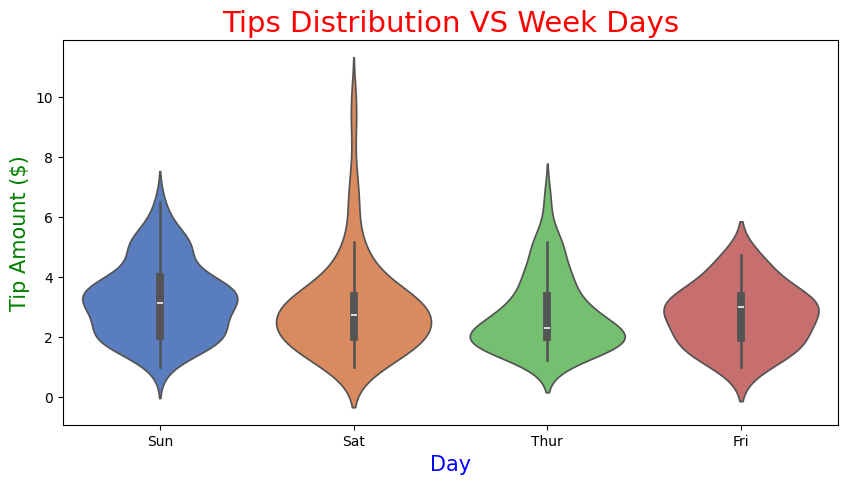

In [17]:
# violin plot(Seaborn)
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 5))
sns.violinplot(x='day', y='tip', data=df, palette='muted')

plt.title('Tips Distribution VS Week Days', color="red", fontsize=21)
plt.xlabel('Day', color="blue", fontsize=15)
plt.ylabel('Tip Amount ($)', color="green", fontsize=15)
plt.show()

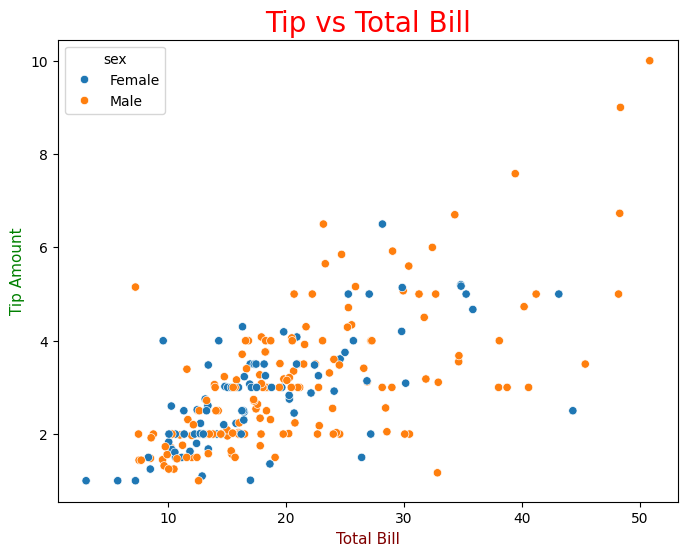

In [18]:
# 4. Scatter Plot: Tip vs Total Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title('Tip vs Total Bill', color="red", fontsize=20)
plt.ylabel('Tip Amount', color="green", fontsize=11)
plt.xlabel('Total Bill', color="maroon", fontsize=11)
plt.show()

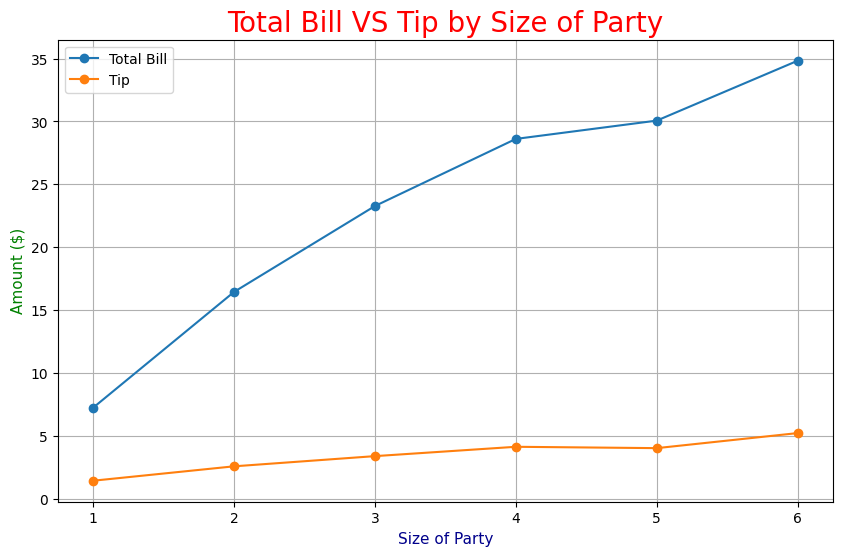

In [19]:
# Plot Total Bill and Tip VS Size of Party in a single line
plt.figure(figsize=(10, 6))

# Plot Total Bill and Tip with one-liner for each
plt.plot(df.groupby('size')['total_bill'].mean().index, df.groupby('size')['total_bill'].mean(), marker='o', label='Total Bill')
plt.plot(df.groupby('size')['tip'].mean().index, df.groupby('size')['tip'].mean(), marker='o', label='Tip')

# Titles and labels
plt.title('Total Bill VS Tip by Size of Party', color="red", fontsize=20)
plt.xlabel('Size of Party', color="darkblue", fontsize=11)
plt.ylabel('Amount ($)', color="green", fontsize=11)
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

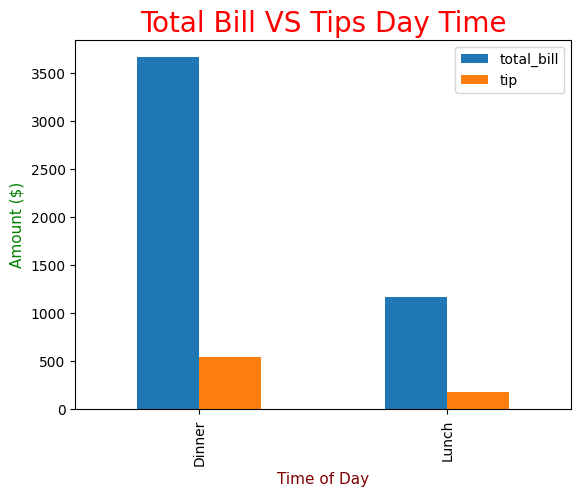

In [20]:
# 6. Bar Chart: Total Bill and Tips by Time of Day
plt.figure(figsize=(8, 6))
df.groupby('time')[['total_bill', 'tip']].sum().plot(kind='bar', stacked=False)
plt.title('Total Bill VS Tips Day Time', color="red", fontsize=20)
plt.ylabel('Amount ($)', color="green", fontsize=11)
plt.xlabel('Time of Day', color="maroon", fontsize=11)
plt.show()

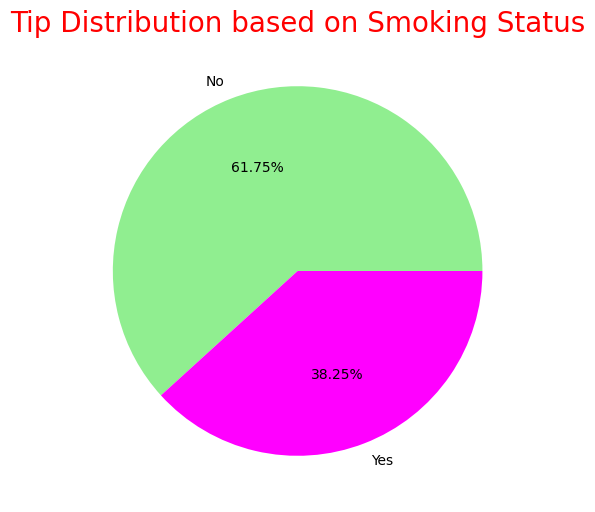

In [21]:
# 7. Pie Chart: Distribution of Tips by Smoker Status
smoker_tip_sum = df.groupby('smoker')['tip'].sum()
plt.figure(figsize=(8, 6))
smoker_tip_sum.plot.pie(autopct='%1.2f%%', colors=['lightgreen', 'magenta'])
plt.title('Tip Distribution based on Smoking Status', color="red", fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Conclusion

#### Short Summary of my Project
This project on the "Tips" database has been a mindblowing exploration of data analysis and machine learning techniques using Python and its powerful libraries. Throughout this project, I have utilized various tools such as Pandas, Seaborn, and Scikit-learn, specifically linear regression. The project demonstrated the effective application of these tools to extract meaningful insights from the data and build predictive models.
By working on this project, I gained hands-on experience in handling real-world data, performing exploratory data analysis, and applying machine learning algorithms. The project also highlighted the importance of data preprocessing and the impact of feature selection on model performance.

#### References
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Geeks for Geeks](https://www.geeksforgeeks.org/)
- [ChatGPT](https://chatgpt.com/)
- [Gemini](https://gemini.google.com/app)
- [Data Professor (YouTube Channel)](https://www.youtube.com/@DataProfessor)
- [Code With Harry (YouTube Channel)](https://www.youtube.com/@CodeWithHarry)


#### Acknowledgements
I would like to express my sincere gratitude to my professors and trainers who guided me throughout this project. Their invaluable teachings and encouragement were crucial in completing this work. Thank you to my peers for their feedback and discussions, which helped shape this project into its final form.